In [312]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import os
import sys

from wordcloud import WordCloud
from missingno import geoplot
from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set_style("darkgrid")
sb.set()

In [313]:
df = pd.read_csv("D:\Open Classroom\Data Files\Sppotify Dataset\data.csv")
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [315]:
df.describe().round(decimals = 2).style.background_gradient(cmap = "Reds")

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.530000,1976.790000,0.500000,0.540000,230948.310000,0.480000,0.080000,0.170000,5.200000,0.210000,-11.470000,0.710000,31.430000,0.100000,116.860000
std,0.260000,25.920000,0.380000,0.180000,126118.410000,0.270000,0.280000,0.310000,3.520000,0.170000,5.700000,0.460000,21.830000,0.160000,30.710000
min,0.000000,1921.000000,0.000000,0.000000,5108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320000,1956.000000,0.100000,0.420000,169827.000000,0.260000,0.000000,0.000000,2.000000,0.100000,-14.620000,0.000000,11.000000,0.030000,93.420000
50%,0.540000,1977.000000,0.520000,0.550000,207467.000000,0.470000,0.000000,0.000000,5.000000,0.140000,-10.580000,1.000000,33.000000,0.040000,114.730000
75%,0.750000,1999.000000,0.890000,0.670000,262400.000000,0.700000,0.000000,0.100000,8.000000,0.260000,-7.180000,1.000000,48.000000,0.080000,135.540000
max,1.000000,2020.000000,1.000000,0.990000,5403500.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.860000,1.000000,100.000000,0.970000,243.510000


#### Get the Pearsons Correlation of Columns

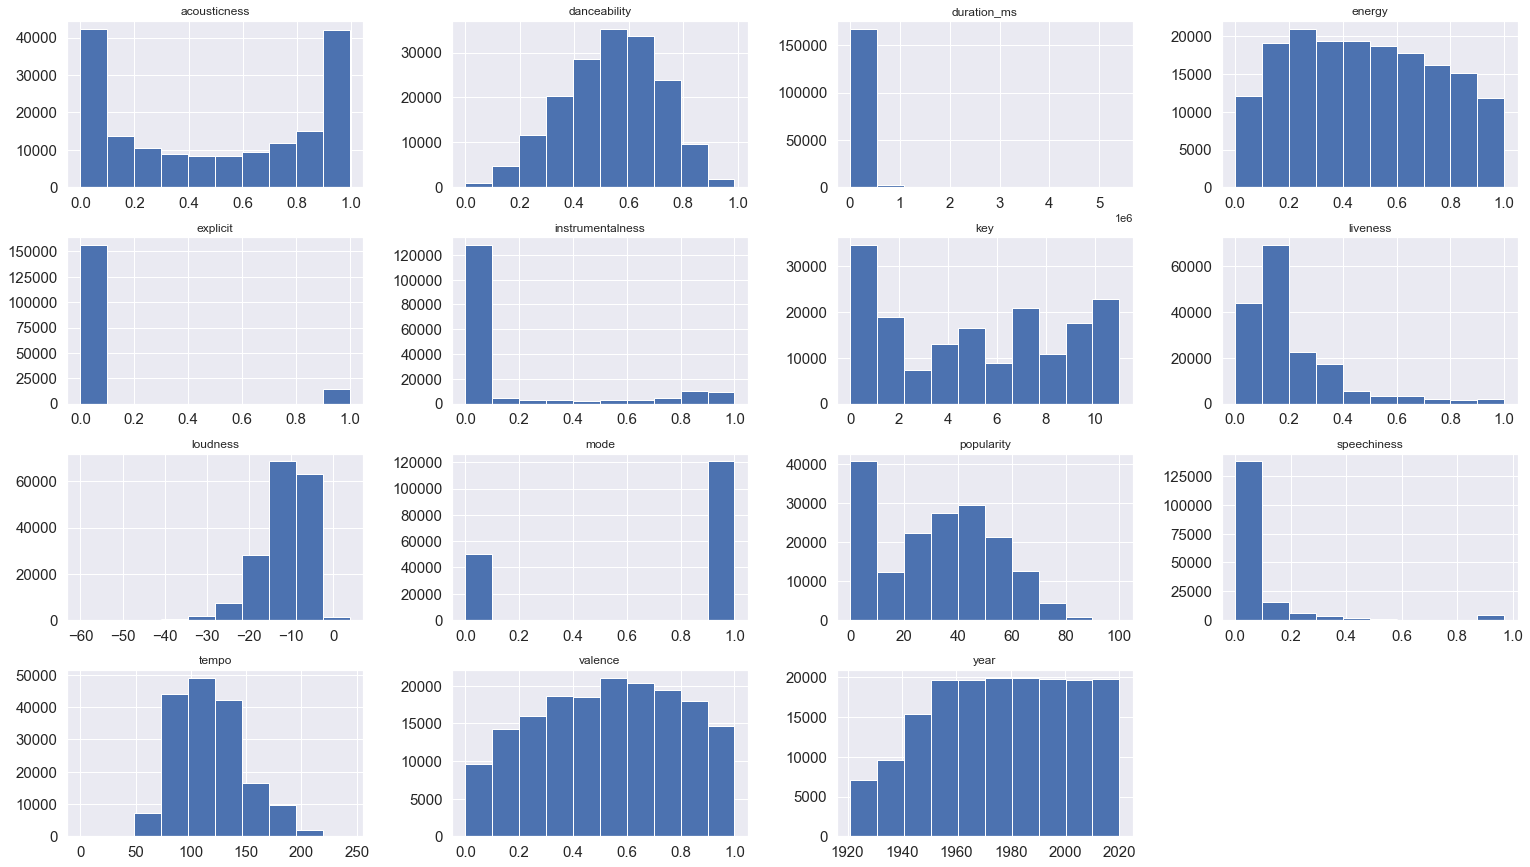

In [341]:
df.hist(figsize = (26, 15), ylabelsize = 15, xlabelsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [317]:
df.head()
df.drop(columns = ["id"], inplace = True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Text(0.5, 1.0, '\nHeatmap showing the Pearson Correlation / Dependency \nBetween the Spotify Dataset Columns\n')

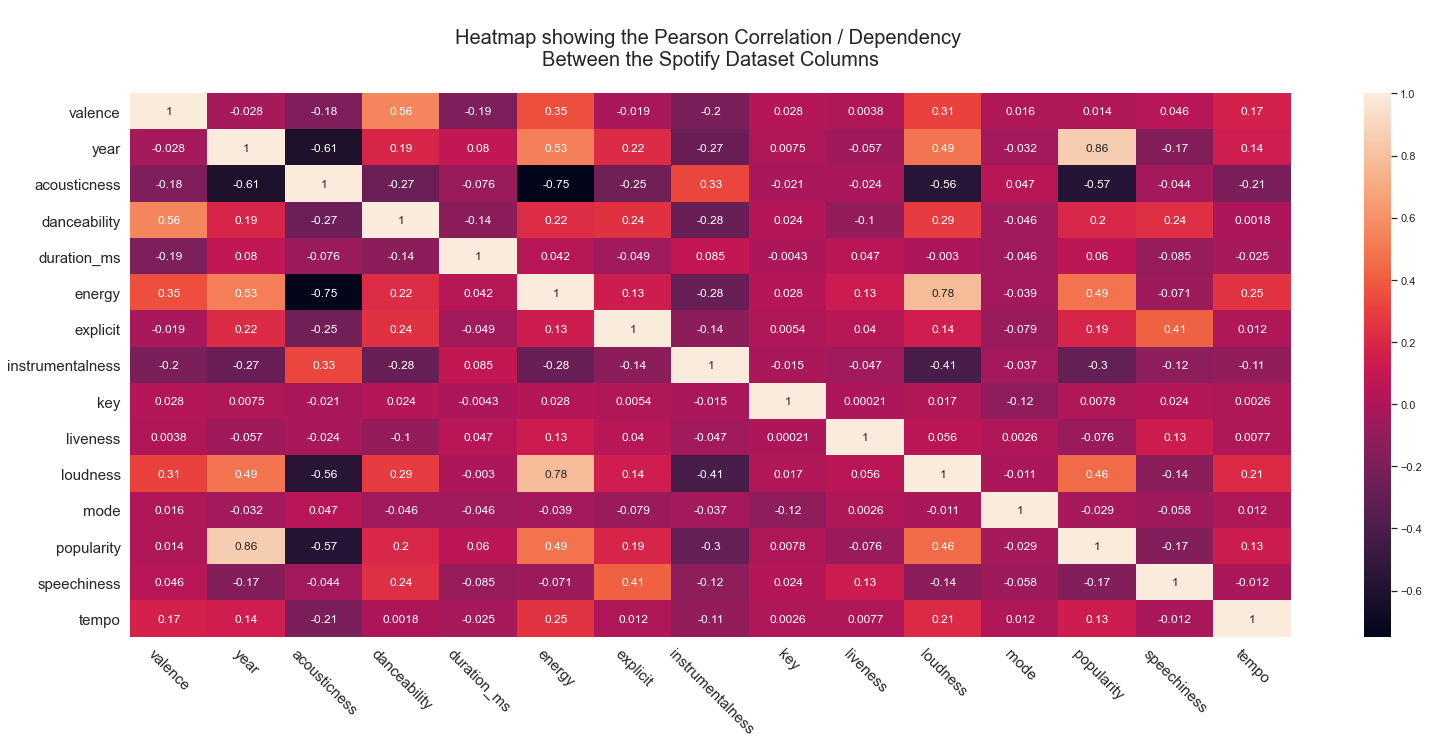

In [318]:
plt.figure(figsize = (26, 10))
sb.heatmap(df.corr(), annot = True)
#sb.heatmap(df.corr(method = "kendall"), annot = True)
#sb.heatmap(df.corr(method = "spearman"), annot = True)
plt.xticks(fontsize = 15, rotation = -45)
plt.yticks(fontsize = 15)
plt.title("\nHeatmap showing the Pearson Correlation / Dependency \nBetween the Spotify Dataset Columns\n", fontsize = 20)

Text(0.5, 1.0, '\nHeatmap showing the Kendall Correlation measures of the strength and direction \nThat exists Between the Spotify Dataset Columns\n')

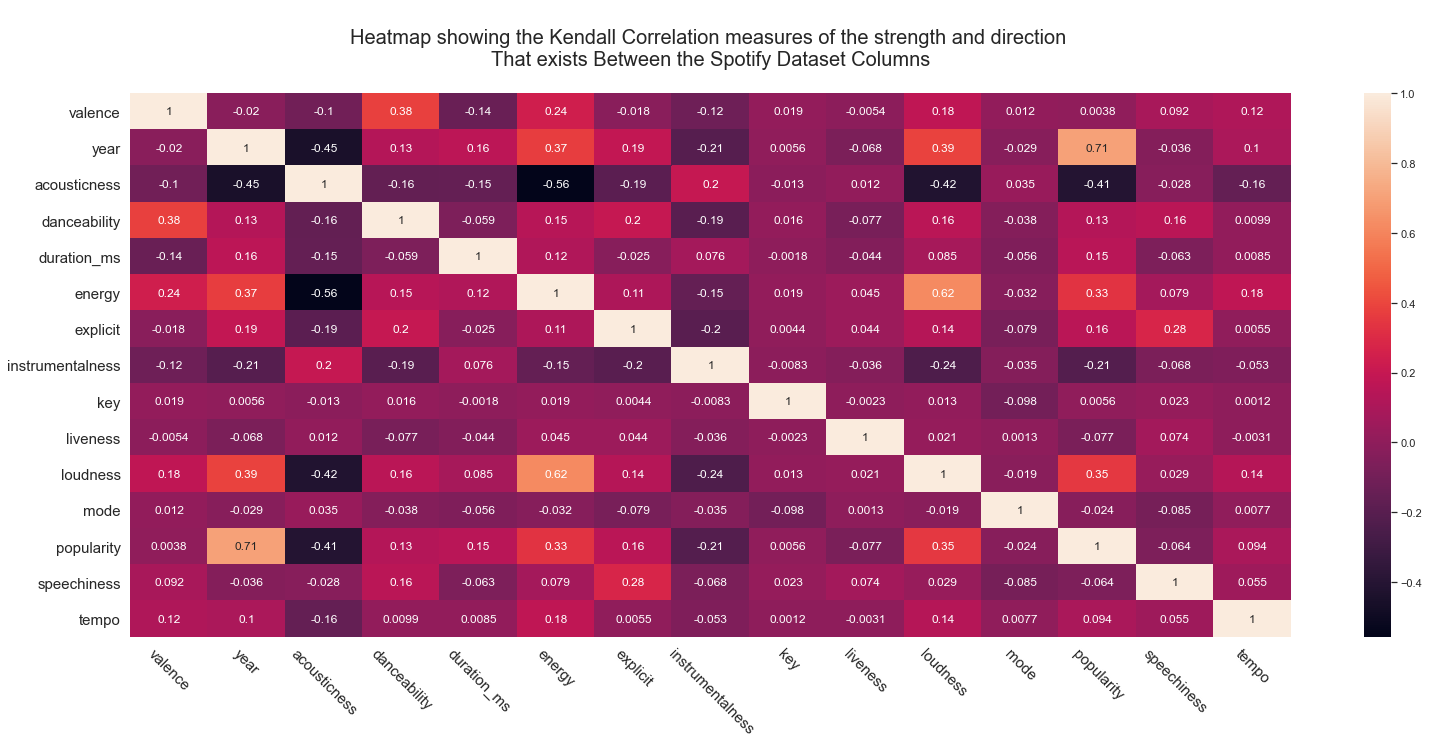

In [319]:
plt.figure(figsize = (26, 10))
sb.heatmap(df.corr(method = "kendall"), annot = True)
plt.xticks(fontsize = 15, rotation = -45)
plt.yticks(fontsize = 15)
plt.title("\nHeatmap showing the Kendall Correlation measures of the strength and direction \nThat exists Between the Spotify Dataset Columns\n", fontsize = 20)

Text(0.5, 1.0, '\nHeatmap showing the Spearman Correlation measures of the strength and direction \nThat exists Between the Spotify Dataset Columns\n')

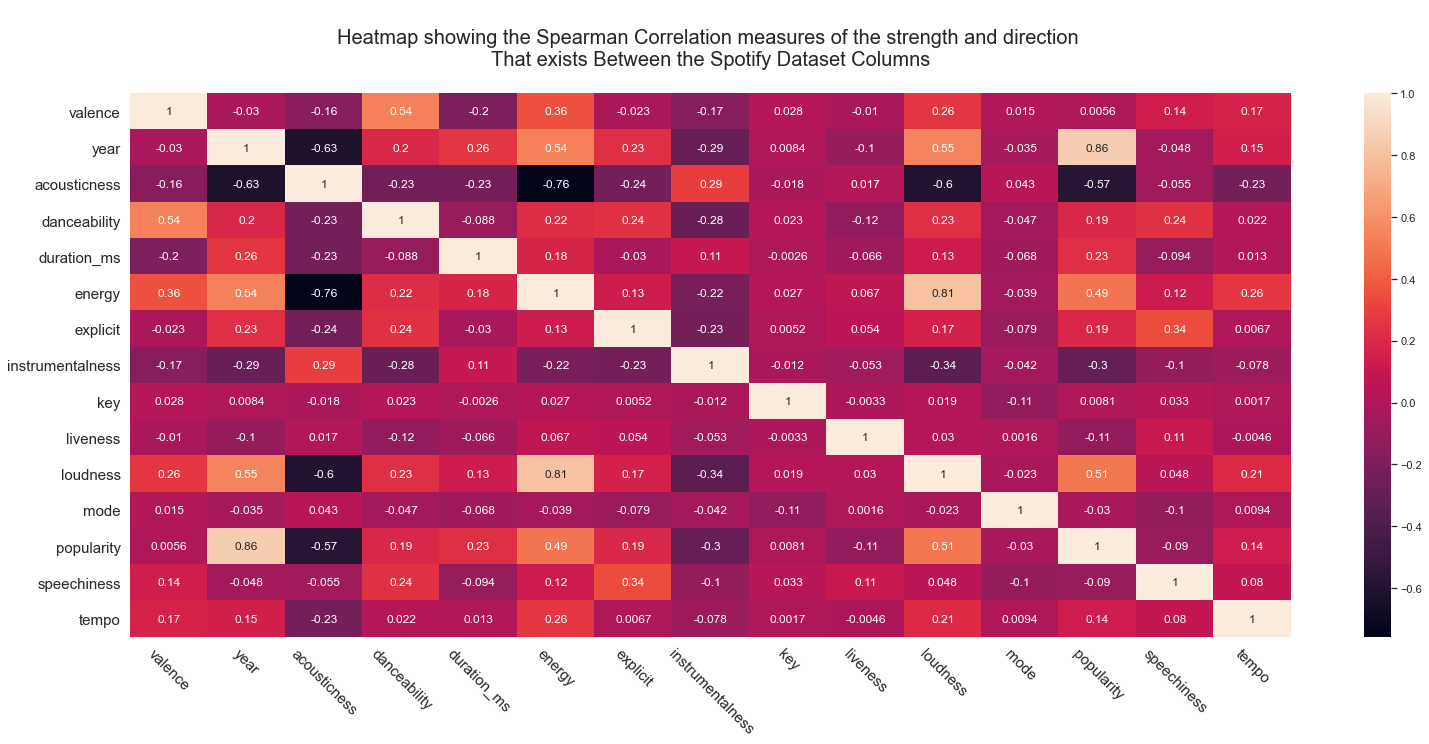

In [320]:
plt.figure(figsize = (26, 10))
sb.heatmap(df.corr(method = "spearman"), annot = True)
plt.xticks(fontsize = 15, rotation = -45)
plt.yticks(fontsize = 15)
plt.title("\nHeatmap showing the Spearman Correlation measures of the strength and direction \nThat exists Between the Spotify Dataset Columns\n", fontsize = 20)

In [321]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


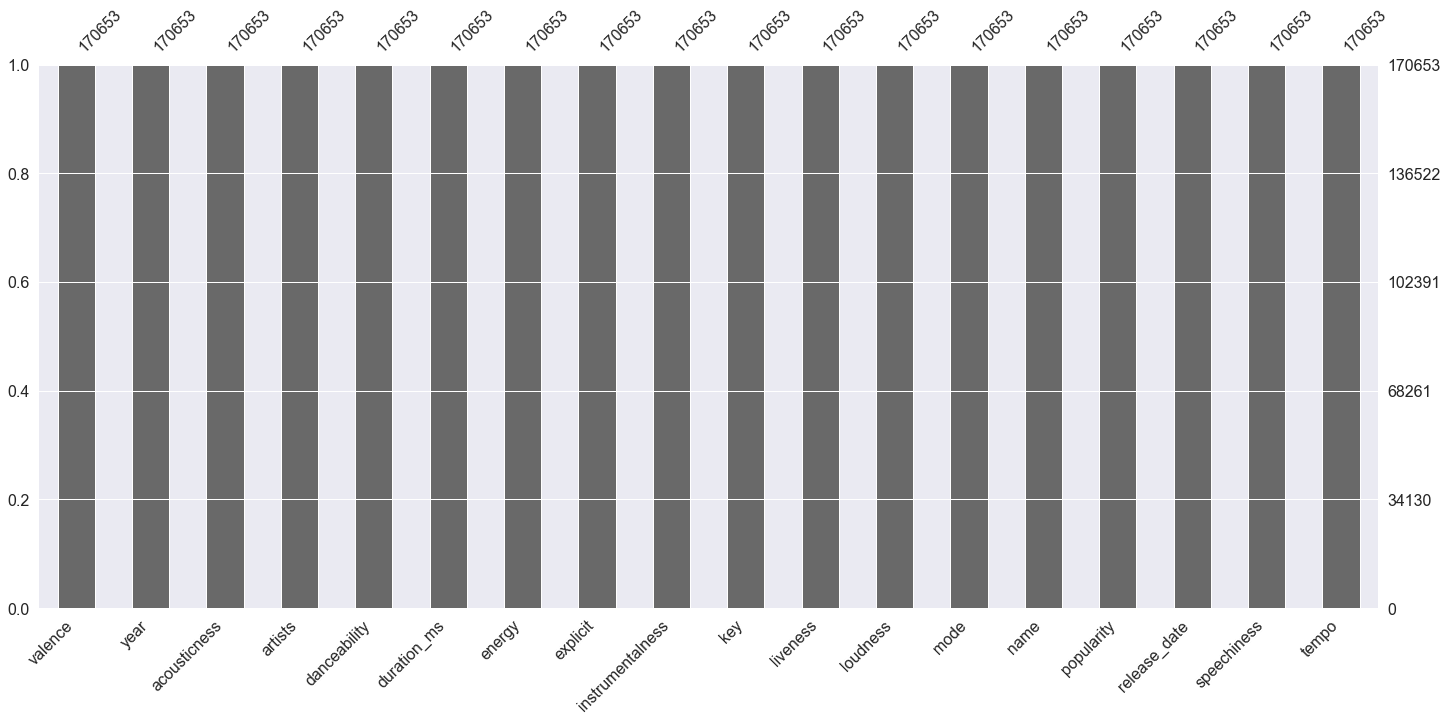

In [322]:
msno.bar(df)

In [323]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


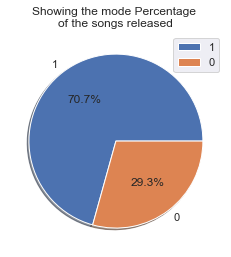

In [324]:
plt.pie(x = (df["mode"].value_counts(normalize = True) * 100), shadow = True, labels = (df["mode"].value_counts().keys()), autopct = "%1.1f%%")
plt.title("Showing the mode Percentage \nof the songs released")
plt.legend()

In [325]:
df["mode"].value_counts().keys()

Int64Index([1, 0], dtype='int64')

#### Get the Popularity of each song by year released

Text(0.5, 1.0, 'Popularity of Released Songs over the years \n (1920 To Date [2020])\n')

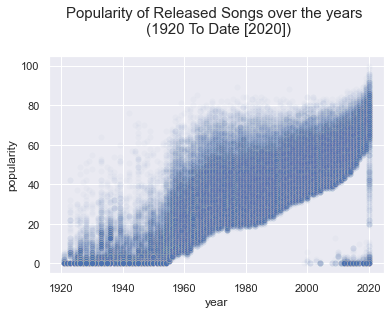

In [326]:
sb.scatterplot(x = "year", y = "popularity", data = df, alpha = 0.03)
plt.title("Popularity of Released Songs over the years \n (1920 To Date [2020])\n", fontsize = 15)

#### Get to know the Valence conveyed by a track

Text(0.5, 1.0, 'Conveying the Positiveness of a Track by Popularity')

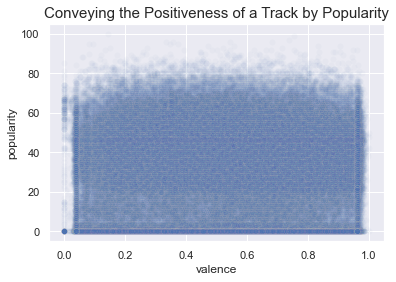

In [327]:
sb.scatterplot(x = "valence", y = "popularity", data = df, alpha = 0.03)
plt.title("Conveying the Positiveness of a Track by Popularity", fontsize = 15)

#### Get to know the danceability of a Track

Text(0.5, 1.0, 'How Danceable a Track is by its Popularity')

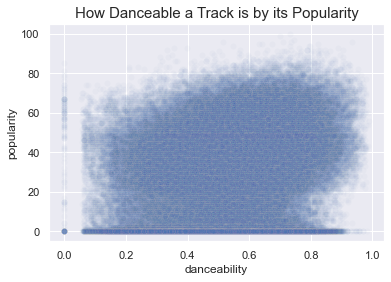

In [328]:
sb.scatterplot(x = "danceability", y = "popularity", data = df, alpha = 0.03)
plt.title("How Danceable a Track is by its Popularity", fontsize = 15)

#### Get to know the energy that a Track brings to listeners

Text(0.5, 1.0, 'Amount of Energy brought by a Track')

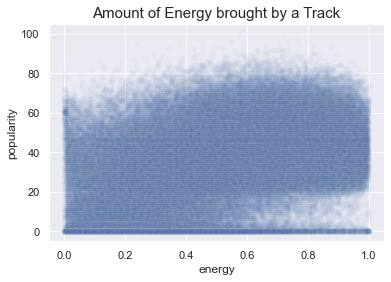

In [329]:
sb.scatterplot(x = "energy", y = "popularity", data = df, alpha = 0.03)
plt.title("Amount of Energy brought by a Track", fontsize = 15)

Text(0.5, 1.0, 'Loudness Based on Tracks')

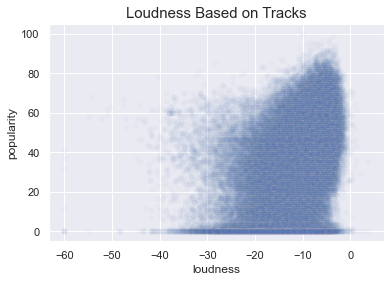

In [330]:
sb.scatterplot(x = "loudness", y = "popularity", data = df, alpha = 0.03)
plt.title("Loudness Based on Tracks", fontsize = 15)

Text(0.5, 1.0, 'Level of Positivity that a Track brings')

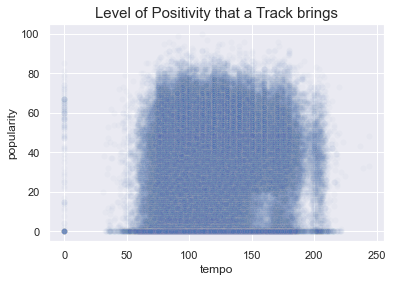

In [331]:
sb.scatterplot(x = "tempo", y = "popularity", data = df, alpha = 0.03)
plt.title("Level of Positivity that a Track brings", fontsize = 15)

In [332]:
#### Group the dataset by Year and 

In [333]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

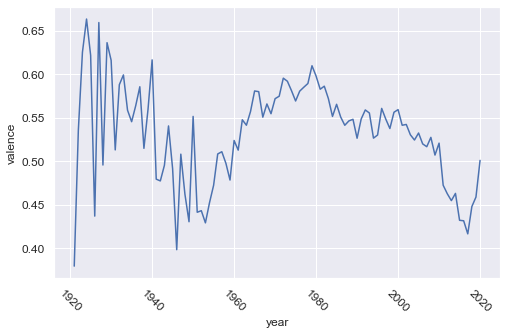

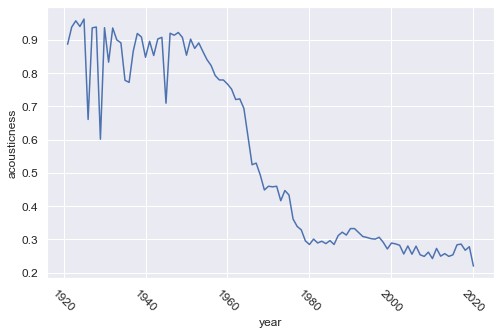

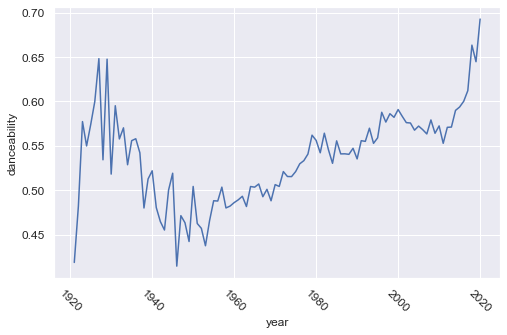

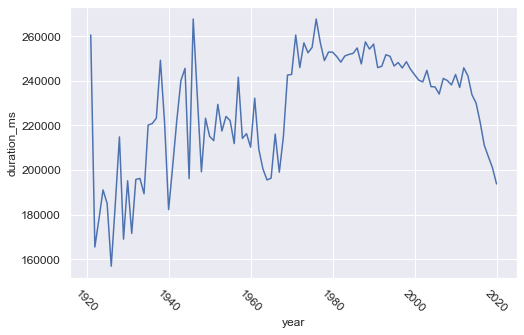

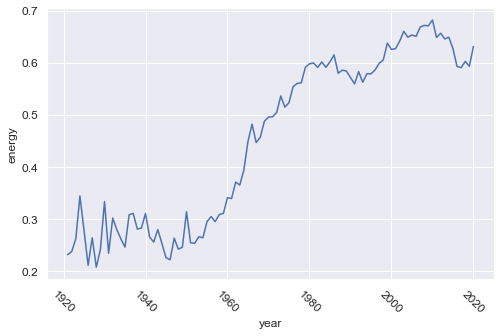

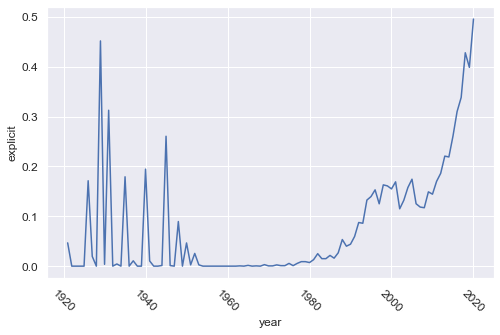

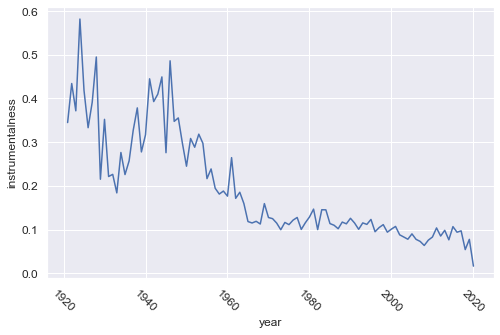

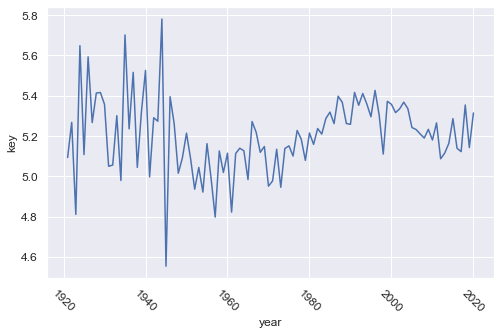

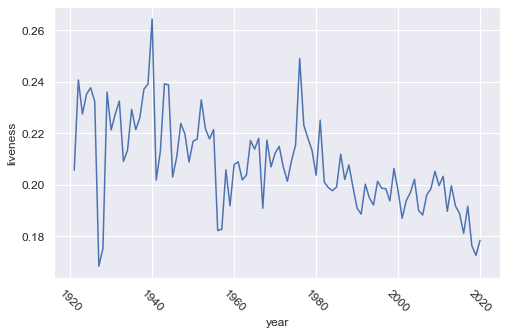

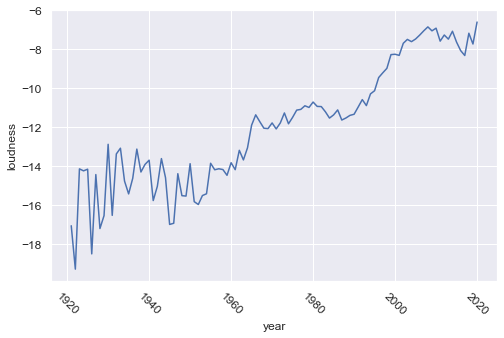

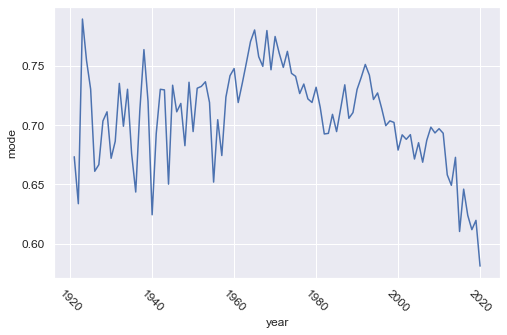

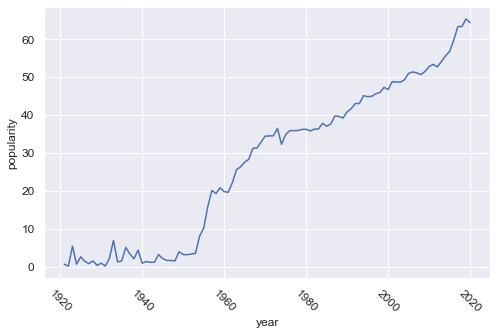

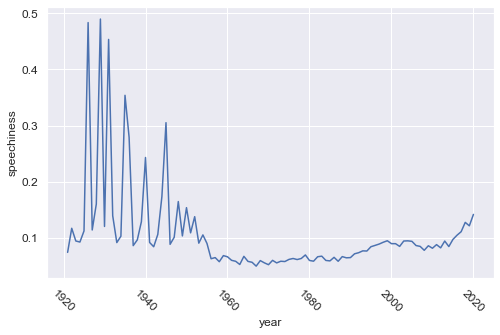

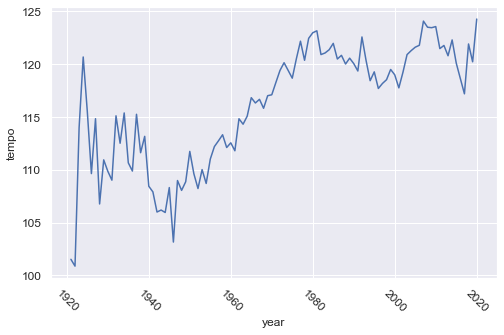

In [335]:
cols = ["valence", "acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness", "key",
        "liveness", "loudness", "mode", "popularity",
       "speechiness", "tempo"]
titles = ["Valence Against Year", "acousticness vs Year", "danceability vs Year","duration_ms vs Year", "energy vs Year", 
          "explicit vs Year", "instrumentalness vs Year", "key vs Year", "liveness vs Year", "loudness vs Year", 
          "mode vs Year", "popularity vs Year", "speechiness vs Year", "tempo vs Year"]
for i in cols:
    y = df.groupby("year")[i].mean()
    x = y.index
    plt.figure(figsize = (8, 5))
    sb.lineplot(x, y, data = df)
    plt.xticks(rotation = -45, fontsize = 12)
    plt.yticks(fontsize = 12)

In [336]:
with open("D:\Open Classroom\Data Files\Sppotify Dataset\data.csv", encoding = "utf-8") as file:
    fileReader = csv.DictReader(file)
    fileCounter = Counter()
    
    for i in fileReader:
        fileCounter.update(i["artists"].split(", "))
        
        #for i in fileReader:
        #    fileCounter.update(i["artists"].split(","))
        #    
        #for i in fileReader:
        #    fileCounter.update(i["artists"].split("']"))
                
print(fileCounter.most_common(100))

[("['Francisco Canaro'", 1285), ("['Эрнест Хемингуэй']", 1211), ("['Эрих Мария Ремарк']", 1068), ("['Frédéric Chopin'", 1016), ("['Francisco Canaro']", 942), ("['Wolfgang Amadeus Mozart'", 920), ("['Johann Sebastian Bach'", 900), ("['Ludwig van Beethoven'", 886), ("['Frank Sinatra']", 630), ("['Ignacio Corsini']", 628), ("['Giuseppe Verdi'", 593), ("'Vladimir Horowitz']", 585), ("['Igor Stravinsky'", 569), ("'Arturo Toscanini']", 547), ("['Elvis Presley']", 504), ("['Johnny Cash']", 484), ("['Georgette Heyer'", 480), ("['Bob Dylan']", 474), ("['The Rolling Stones']", 471), ("['The Beach Boys']", 455), ("'Charlo']", 453), ("'New York Philharmonic']", 452), ("['Fleetwood Mac']", 437), ("['Dean Martin']", 420), ("['The Beatles']", 407), ("['Queen']", 406), ("['Billie Holiday']", 404), ("'Irina Salkow']", 395), ("['Miles Davis']", 394), ("['Giacomo Puccini'", 380), ("'Glenn Gould']", 377), ("['Ella Fitzgerald']", 365), ("'Columbia Symphony Orchestra']", 360), ("['Lead Belly']", 337), ("['C

In [337]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [348]:
df["artists"].value_counts().head(50)

['Эрнест Хемингуэй']                        1211
['Эрих Мария Ремарк']                       1068
['Francisco Canaro']                         942
['Frank Sinatra']                            630
['Ignacio Corsini']                          628
['Elvis Presley']                            504
['Johnny Cash']                              484
['Bob Dylan']                                474
['The Rolling Stones']                       471
['The Beach Boys']                           455
['Francisco Canaro', 'Charlo']               453
['Fleetwood Mac']                            437
['Dean Martin']                              420
['The Beatles']                              407
['Queen']                                    406
['Billie Holiday']                           404
['Georgette Heyer', 'Irina Salkow']          395
['Miles Davis']                              394
['Ella Fitzgerald']                          365
['Lead Belly']                               337
['Led Zeppelin']    

In [345]:

def get_artist(artist):
    return artist.split(",")[0]#.strip("")

def get_artistbr(artist):
    return artist.split("[")

df["artist_split"] = df["artists"].apply(lambda x: f"{get_artist(x)}")# ({get_artistbr(x)})")
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artist_split
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,['Sergei Rachmaninoff'
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,['Dennis Day']
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,['Frank Parker']
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,['Phil Regan']


In [346]:
df.loc[2, "artist_split"]

"['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat']"

In [347]:
df["artist_split"].value_counts()

['Francisco Canaro'          1285
['Эрнест Хемингуэй']         1211
['Эрих Мария Ремарк']        1068
['Frédéric Chopin'           1016
['Francisco Canaro']          942
                             ... 
['Alex C.'                      1
['Dead Meadow']                 1
['Felipe Rodriguez'             1
['Spirits Of Our Dreams']       1
['Micky & The Motorcars']       1
Name: artist_split, Length: 23658, dtype: int64